Primero se importarán las herramientas que serán utilizadas para el análisis de datos.

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import funciones.paths as paths

**Archivo imágenes clasificadas**

Lo primero que haremos es obtener el Data Frame a partir del archivo de imágenes etiquetadas.


In [176]:
df = pd.read_csv(paths.DIR_ETIQUETAR)
df

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09


-*Gráfico de torta que muestre los porcentajes según el tipo de imagen*

Creamos una serie con la información de los tipos de las imágenes.

In [177]:
serie_tipos = df.groupby(df['Tipo']).size()
serie_tipos

Tipo
JPEG    8
PNG     1
WEBP    1
dtype: int64

Creamos una lista de etiquetas en el que se muestra cada tipo de imagen utilizada

In [178]:
etiquetas = list(serie_tipos.index)
etiquetas

['JPEG', 'PNG', 'WEBP']

Luego de obtener la serie realizamos el gráfico de torta que muestre los porcentajes según el tipo de imagen

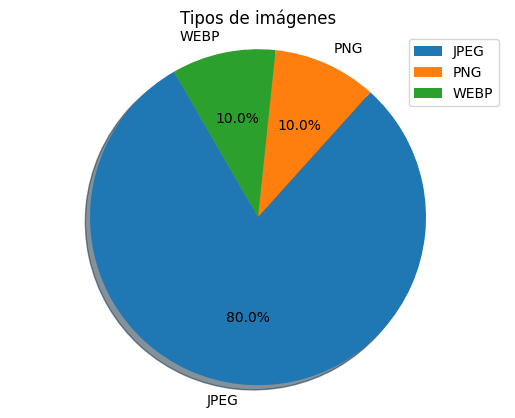

In [179]:
plt.pie(serie_tipos, labels= etiquetas, autopct='%1.1f%%', shadow= True, startangle=120, labeldistance= 1.1)
plt.axis('equal')
plt.legend(etiquetas)
plt.title('Tipos de imágenes')
plt.show()

-*Calcular los valores máximos de ancho y de alto de las imágenes clasificada*

Creamos una Data Frame con la resolución de las imágenes, divididos por ancho y alto

In [180]:
df_resoluciones = df['Resolucion'].str.split(',', expand=True)
df_resoluciones.columns = ('Ancho', 'Alto')
df_resoluciones


,Ancho,Alto
0,(640,359)
1,(1280,797)
2,(265,190)
3,(275,183)
4,(1024,500)
5,(1280,720)
6,(284,177)
7,(600,374)
8,(1000,643)
9,(640,360)


Eliminamos los paréntesis de apertura y cierre en el Data Frame

In [181]:
df_resoluciones['Ancho'] = df_resoluciones['Ancho'].str[1:]
df_resoluciones['Alto'] = df_resoluciones['Alto'].str[:-1]
df_resoluciones

,Ancho,Alto
0,640,359
1,1280,797
2,265,190
3,275,183
4,1024,500
5,1280,720
6,284,177
7,600,374
8,1000,643
9,640,360


Pasamos el Data Frame a enteros y obtenemos los máximos

In [182]:
df_resoluciones['Ancho'] = df_resoluciones['Ancho'].astype(int)
df_resoluciones['Alto'] = df_resoluciones['Alto'].astype(int)
print(f'Máximo ancho: {df_resoluciones["Ancho"].max()} px \nMáximo alto: {df_resoluciones["Alto"].max()} px')


Máximo ancho: 1280 px 
Máximo alto: 797 px


-*Generar un gráfico de dispersión para visualizar la relación entre el ancho y el alto de las imágenes.*

Se asocia a la variable x los valores del ancho de las imágenes etiquetadas y a la variable y los valores del alto de las mismas

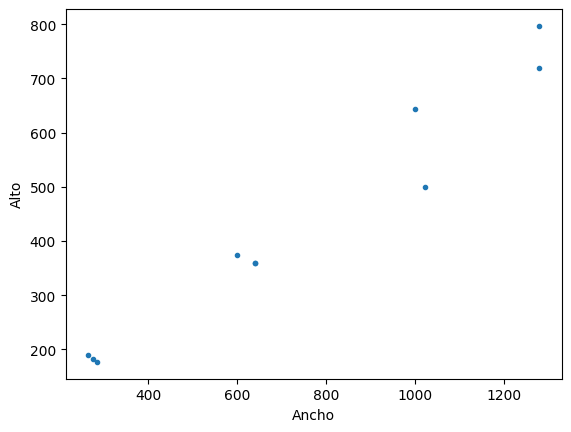

In [183]:
x = df_resoluciones['Ancho']
y = df_resoluciones['Alto']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = ".")
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()


-*En base a la fecha de última actualización, cantidad de cambios realizados para cada día de la semana (posible gráfico de torta o barras).*

Se importa datetime y se crea una nueva columna en el Data Frame llamada Fecha

In [184]:
from datetime import datetime

df['Hora'] = round(df['Hora'])
df['Fecha'] = df['Hora'].apply(lambda x: datetime.fromtimestamp(x))
df

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora,Fecha
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09,2023-06-19 02:55:27
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09,2023-06-19 02:55:42
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09,2023-06-19 02:55:53
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09,2023-06-19 02:56:09
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09,2023-06-19 02:56:29
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09,2023-06-19 02:56:52
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09,2023-06-19 02:57:33
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09,2023-06-19 02:57:44
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09,2023-06-19 02:58:22
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09,2023-06-19 02:59:01


Se crea una columna para dia de la semana

In [185]:
df['Dia_semana'] = df['Fecha'].dt.day_name()
df

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora,Fecha,Dia_semana
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09,2023-06-19 02:55:27,Monday
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09,2023-06-19 02:55:42,Monday
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09,2023-06-19 02:55:53,Monday
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09,2023-06-19 02:56:09,Monday
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09,2023-06-19 02:56:29,Monday
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09,2023-06-19 02:56:52,Monday
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09,2023-06-19 02:57:33,Monday
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09,2023-06-19 02:57:44,Monday
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09,2023-06-19 02:58:22,Monday
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09,2023-06-19 02:59:01,Monday


Se crea un gráfico de barras con los días de la semana en los que se realizó algún etiquetado de imagen

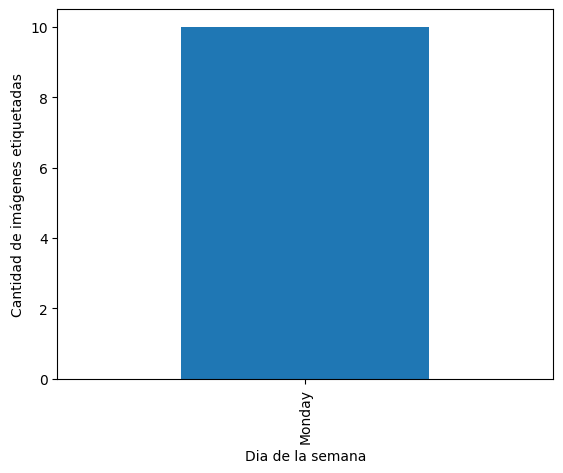

In [186]:
dias_semana = df["Dia_semana"].value_counts()
dias_semana.plot(kind="bar")
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de imágenes etiquetadas')
plt.show()

-*Crear un gráfico de líneas para visualizar la evolución de la cantidad de actualizaciones a lo largo del tiempo.*

Creo una nueva columna en el Data Frame en la que solo aparezca el dia (año, mes, dia)

In [187]:
df['Dia'] = df['Fecha'].dt.date
df

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora,Fecha,Dia_semana,Dia
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09,2023-06-19 02:55:27,Monday,2023-06-19
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09,2023-06-19 02:55:42,Monday,2023-06-19
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09,2023-06-19 02:55:53,Monday,2023-06-19
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09,2023-06-19 02:56:09,Monday,2023-06-19
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09,2023-06-19 02:56:29,Monday,2023-06-19
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09,2023-06-19 02:56:52,Monday,2023-06-19
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09,2023-06-19 02:57:33,Monday,2023-06-19
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09,2023-06-19 02:57:44,Monday,2023-06-19
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09,2023-06-19 02:58:22,Monday,2023-06-19
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09,2023-06-19 02:59:01,Monday,2023-06-19


Creo el grafico de lineas utilizando la columna creada anteriormente

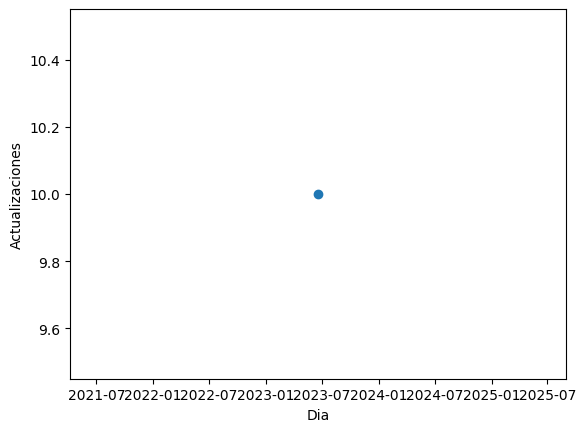

In [188]:
dias = df['Dia'].value_counts()
valoresX = df['Dia'].value_counts()
valoresY = df['Dia'].unique()
fig, ax = plt.subplots()
ax.plot(valoresY, valoresX, marker = "o")
plt.xlabel('Dia')
plt.ylabel('Actualizaciones')
plt.show()

-*Con la lista de tags generar una nube de palabras*

Importo el modulo wordcloud

In [189]:
from wordcloud import WordCloud, STOPWORDS

Creo una copia del Data Frame para generar una nube de palabras

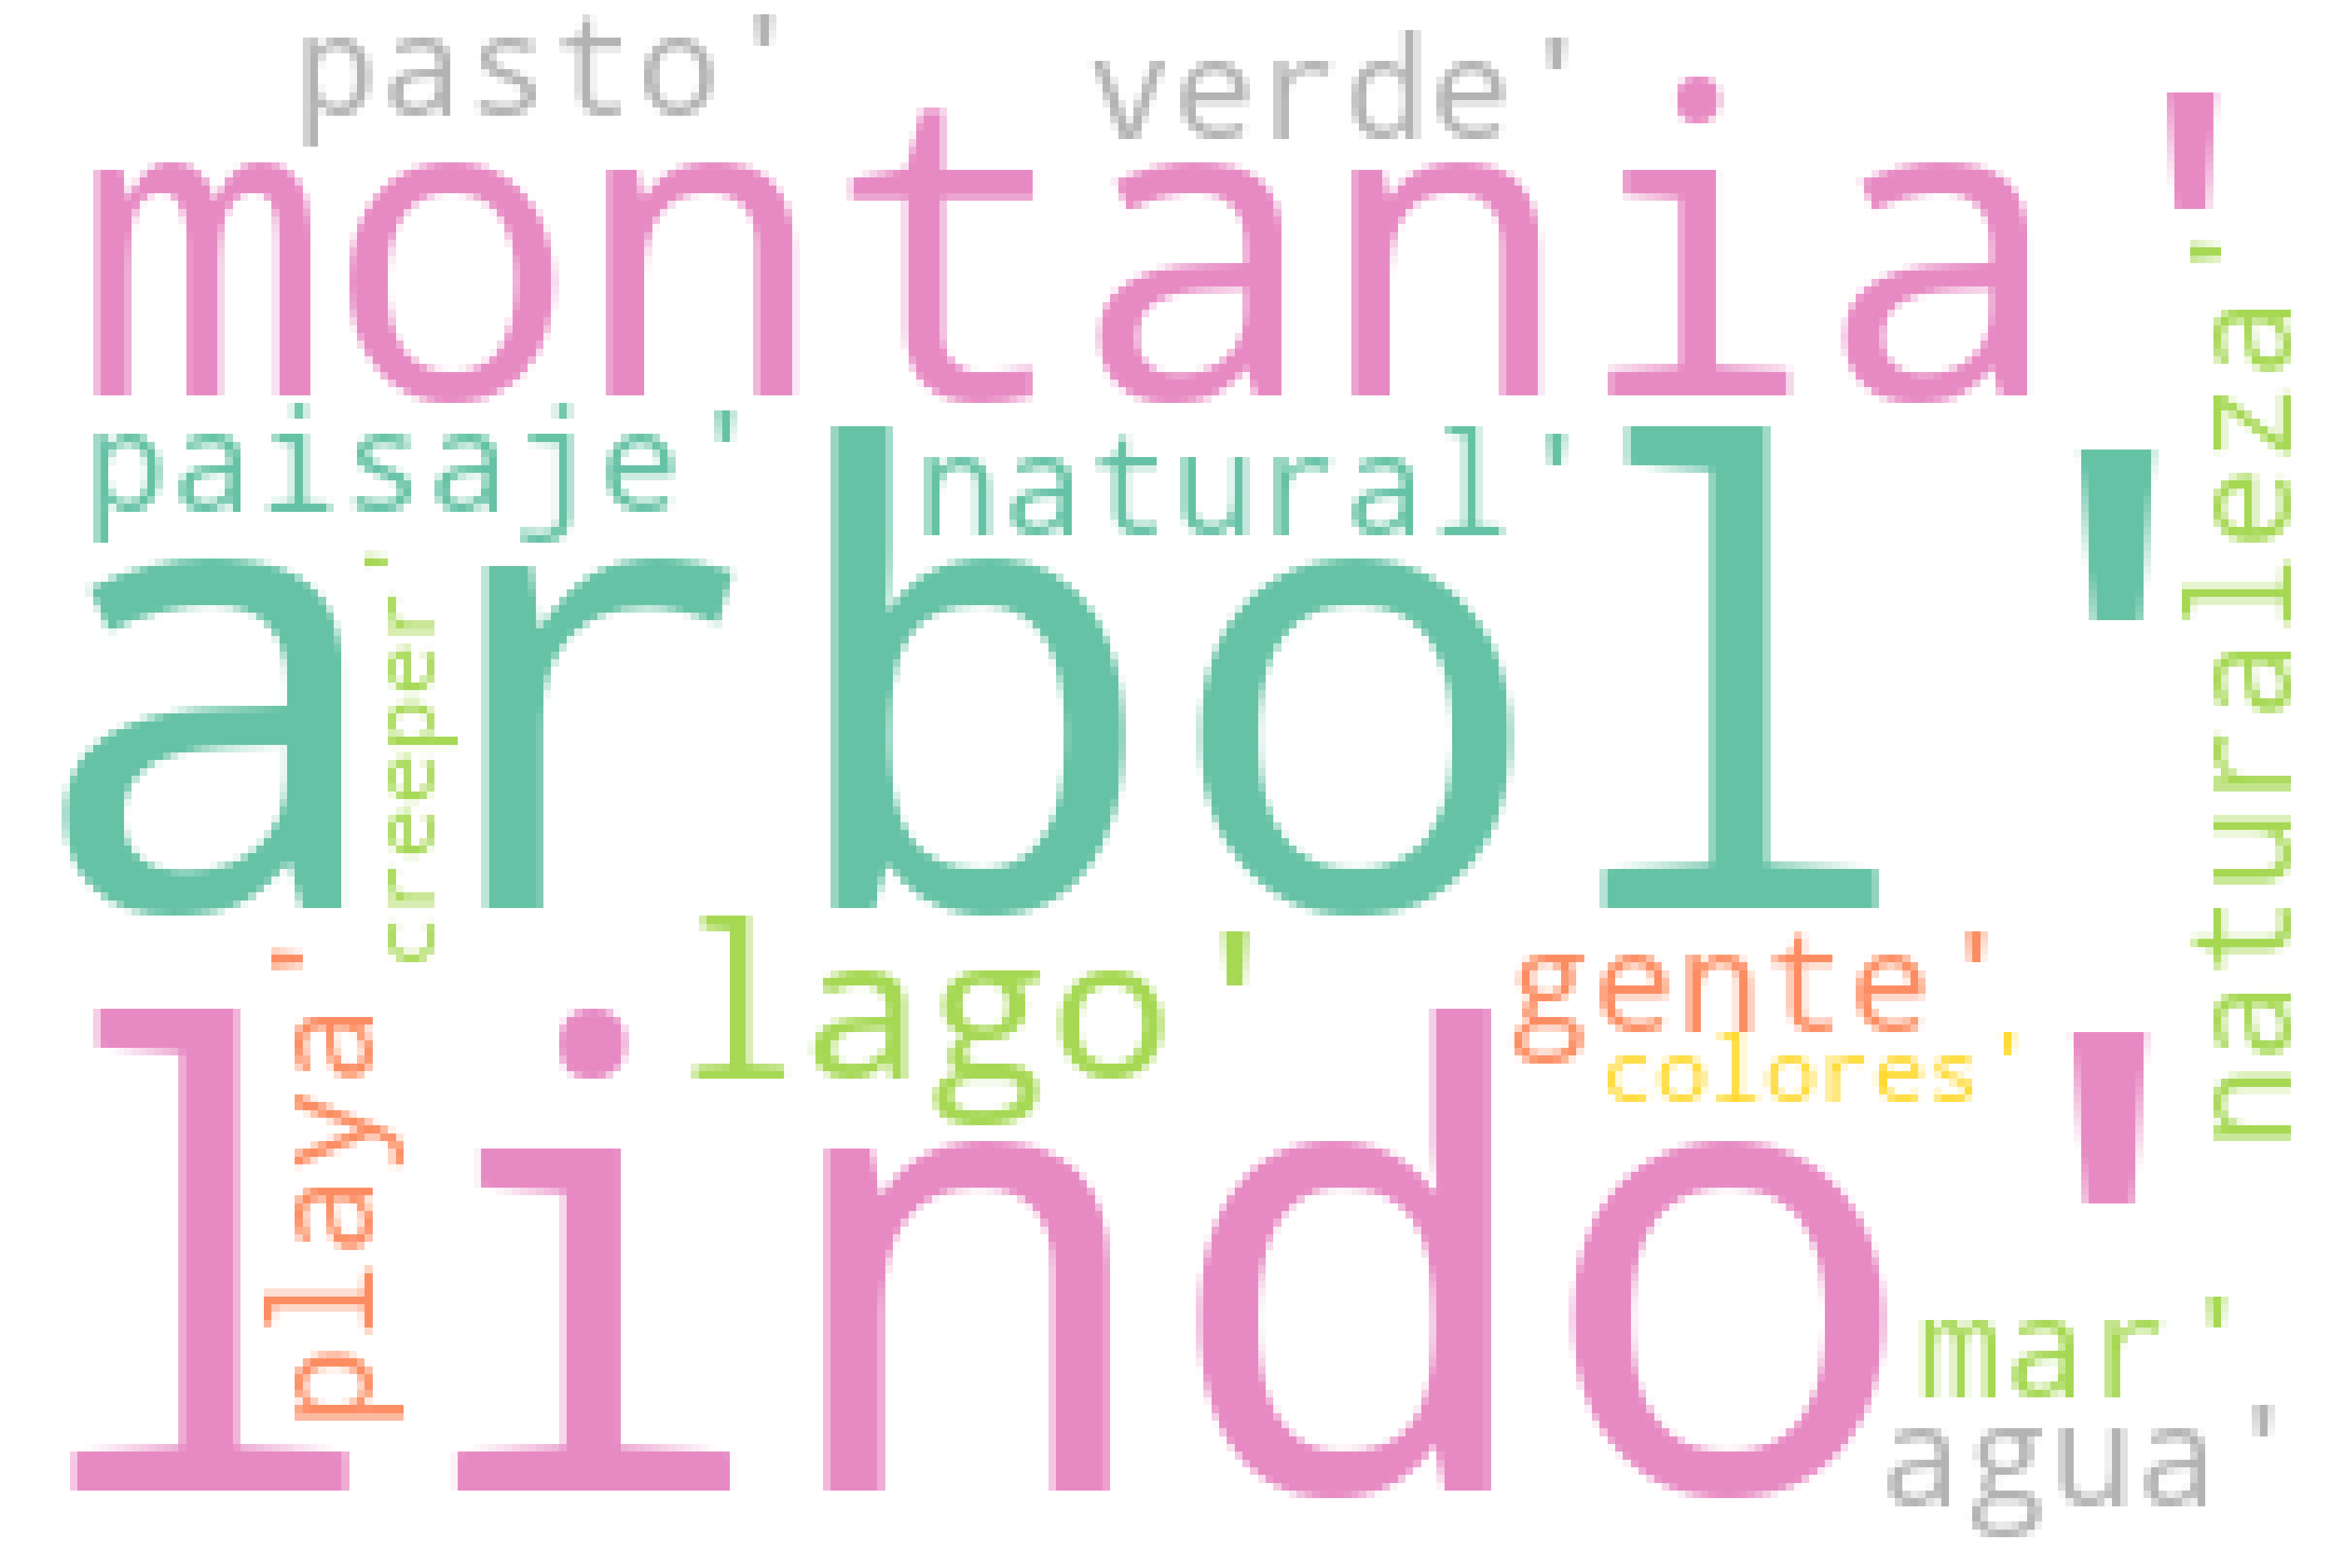

In [190]:
df_nube= df.copy()
df_nube['Tags'] = df['Tags'].str.split(';')
nube_tags = df_nube['Tags'].explode().unique()
text = str(nube_tags)
wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


-*Informar cuáles son los 3 tags más utilizados*

In [191]:
df2= df.copy()
df2['Tags'] = df['Tags'].str.split(';')
tags = df2['Tags'].explode()
df_tags = pd.DataFrame(data=tags)
contador_tags = df_tags.groupby(['Tags']).value_counts().sort_values(ascending= False).head(3)
df_hola = pd.DataFrame(data=contador_tags)
df_hola

,count
Tags,
arbol,2
lindo,2
agua,1


-*Calcular el tamaño en bytes promedio de las imágenes actualizadas por cada perfil, incluir los perfiles que no hayan realizado actualizaciones.*

Primero creamos el Data Frame de los perfiles

In [207]:
df_perfiles = pd.read_json(paths.DIR_USER)
df_perfiles

,Nombre,nick,Edad,Genero,foto
0,messi,messi,36,Hombre,imagenes/avatares/avatar_messi.png
1,otamendi,otamendi,21,Hombre,imagenes/avatares/avatar_otamendi.png
2,lauta,lauta,23,nobinario,imagenes/avatares/avatar_lauta.png
3,ale,garnacho,19,Mujer,imagenes/avatares/avatar_garnacho.png
4,dibu,dibu,30,Hombre,imagenes/avatares/avatar_dibu.png
5,licha,licha,23,Hombre,imagenes/avatares/avatar_licha.png


Se hace un merge entre todos los perfiles y el archivo de etiquetar imágenes

In [193]:
outer_join = pd.merge(df, df_perfiles, on= 'nick', how= 'outer')
outer_join = outer_join.fillna(0)
outer_join

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora,Fecha,Dia_semana,Dia,Nombre,Edad,Genero,foto
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09,2023-06-19 02:55:27,Monday,2023-06-19,messi,36,Hombre,imagenes/avatares/avatar_messi.png
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09,2023-06-19 02:55:42,Monday,2023-06-19,messi,36,Hombre,imagenes/avatares/avatar_messi.png
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09,2023-06-19 02:55:53,Monday,2023-06-19,messi,36,Hombre,imagenes/avatares/avatar_messi.png
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09,2023-06-19 02:56:09,Monday,2023-06-19,otamendi,21,Hombre,imagenes/avatares/avatar_otamendi.png
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09,2023-06-19 02:56:29,Monday,2023-06-19,otamendi,21,Hombre,imagenes/avatares/avatar_otamendi.png
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09,2023-06-19 02:56:52,Monday,2023-06-19,lauta,23,nobinario,imagenes/avatares/avatar_lauta.png
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09,2023-06-19 02:57:33,Monday,2023-06-19,ale,19,Mujer,imagenes/avatares/avatar_garnacho.png
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09,2023-06-19 02:57:44,Monday,2023-06-19,ale,19,Mujer,imagenes/avatares/avatar_garnacho.png
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09,2023-06-19 02:58:22,Monday,2023-06-19,dibu,30,Hombre,imagenes/avatares/avatar_dibu.png
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09,2023-06-19 02:59:01,Monday,2023-06-19,licha,23,Hombre,imagenes/avatares/avatar_licha.png


Agrupo por el Data Frame por nick y hago un promedio del tamaño

In [194]:
promedio_tamanio_por_nick = outer_join.groupby('nick')['Tamanio'].mean()
promedio_tamanio_por_nick

nick
dibu         70755.000000
garnacho     46661.500000
lauta       101037.000000
licha       436666.000000
messi        97660.333333
otamendi    109166.000000
Name: Tamanio, dtype: float64

**Archivo log del sistema**


Primero abrimos el archivo de logs, pasamos el timestamp a una fecha legible y creamos la columna del dia de la semana.

In [195]:
ds = pd.read_csv(paths.DIR_LOGS, encoding='utf-8')
ds['timestamp'] = ds['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ds['Día'] = ds['timestamp'].dt.day_name()
ds

,timestamp,nick,operacion,valores,textos,Día
0,2023-06-19 02:55:26.692382,messi,nueva_imagen_clasificada,NaN,NaN,Monday
1,2023-06-19 02:55:42.214125,messi,nueva_imagen_clasificada,NaN,NaN,Monday
2,2023-06-19 02:55:52.744954,messi,nueva_imagen_clasificada,NaN,NaN,Monday
3,2023-06-19 02:56:08.803888,otamendi,nueva_imagen_clasificada,NaN,NaN,Monday
4,2023-06-19 02:56:28.501054,otamendi,nueva_imagen_clasificada,NaN,NaN,Monday
5,2023-06-19 02:56:51.966797,lauta,nueva_imagen_clasificada,NaN,NaN,Monday
6,2023-06-19 02:57:11.807623,garnacho,nuevo_perfil,NaN,NaN,Monday
7,2023-06-19 02:57:33.193770,garnacho,nueva_imagen_clasificada,NaN,NaN,Monday
8,2023-06-19 02:57:44.426406,garnacho,nueva_imagen_clasificada,NaN,NaN,Monday
9,2023-06-19 02:58:05.262335,dibu,nuevo_perfil,NaN,NaN,Monday


-Realizar un gráfico comparando los días de la semana en que se realizaron

Día
Monday    43
Name: count, dtype: int64

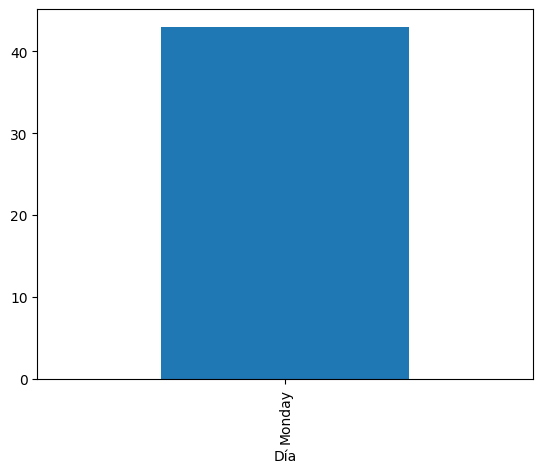

In [196]:
from matplotlib import pyplot as plt
dias = ds['Día'].value_counts().sort_values(ascending=False)
dias.plot(kind='bar')
dias

Para hacer el gráfico de barra, creamos una nueva variable, que contenga el día de la semana y la cantidad de operaciones 
que se hicieron en este.

-Generar un gráfico que muestre los porcentajes de uso de la aplicación por género

In [197]:
js = pd.read_json(paths.DIR_USER)
js

,Nombre,nick,Edad,Genero,foto
0,messi,messi,36,Hombre,imagenes/avatares/avatar_messi.png
1,otamendi,otamendi,21,Hombre,imagenes/avatares/avatar_otamendi.png
2,lauta,lauta,23,nobinario,imagenes/avatares/avatar_lauta.png
3,ale,garnacho,19,Mujer,imagenes/avatares/avatar_garnacho.png
4,dibu,dibu,30,Hombre,imagenes/avatares/avatar_dibu.png
5,licha,licha,23,Hombre,imagenes/avatares/avatar_licha.png


Abrimos el json con pandas,contamos la cantidad de generos y hacemos una con cada uno de ellos.

In [198]:
generos = js['Genero'].value_counts().sort_values(ascending=False)
lista_generos = list(generos.index)
lista_generos

['Hombre', 'nobinario', 'Mujer']

Luego hacemos una lista con la cantidad total de cada genero, y la mostramos en un gráfico de pastel.

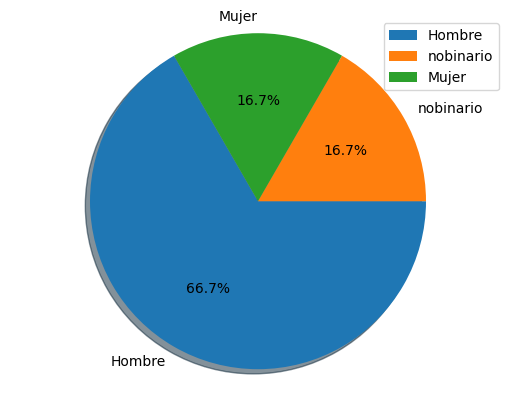

In [199]:
aux = list(generos.values)

plt.pie(aux, labels=lista_generos, autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.legend(lista_generos)
plt.show()


-Generar un gráfico que refleje las cantidades de cada operación realizada.

operacion
modificar_perfil            22
nueva_imagen_clasificada    10
cambio_configuracion         5
nuevo_perfil                 3
nuevo collage                2
nuevo_meme                   1
Name: count, dtype: int64

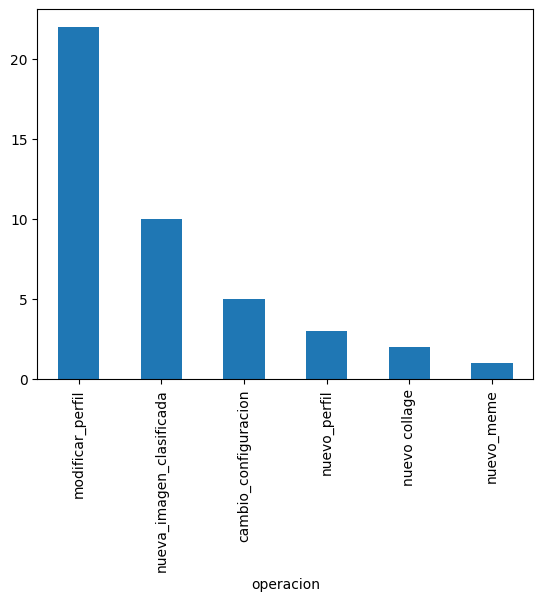

In [200]:
operaciones = ds['operacion'].value_counts().sort_values(ascending=False)
operaciones.plot(kind='bar')
operaciones

Se realiza una operación similar a la antes vista. Para eso creamos una variable 'operacion', que contenga 
cuantas operaciones de cada una se realizaron y luego lo mostramos en el gráfico.

In [201]:
"""data1 = {'nicks': ds['nick']}
data2 = {'nicks': ds['nick'].unique()}
contar = ds[['nick','operacion']].value_counts().sort_values(ascending=True)
dep = pd.DataFrame(data2, index=[contar.value_counts])
dep.plot.barh()"""


"data1 = {'nicks': ds['nick']}\ndata2 = {'nicks': ds['nick'].unique()}\ncontar = ds[['nick','operacion']].value_counts().sort_values(ascending=True)\ndep = pd.DataFrame(data2, index=[contar.value_counts])\ndep.plot.barh()"

-Generar un ranking de las 5 imágenes más usadas para generar memes y otro para
generar collages.

En un Data frame se guardan aquellas filas donde la operacion sea "nuevo_meme". Luego se divide el valor de las imagenes y se las guarda en un nuevo dataframe. Finalmente, en la variable contador imagenes se agrupa por imagen, se cuenta cuantas veces aparece cada una, se ordena el dataframe y se toman los primeros 5 para mostrar

In [205]:
newds = ds.copy()
newds = newds[(newds['operacion'] == 'nuevo_meme')] 
newds['valores'] = newds['valores'].str.split(';')
imagenes = newds['valores'].explode()
ds_imagenes = pd.DataFrame(data=imagenes)
contador_imagenes = ds_imagenes.groupby(['valores']).value_counts().sort_values(ascending= False).head(5)
contador_imagenes

valores
tres_dragones.jpg    1
Name: count, dtype: int64

Lo mismo ocurre con las 5 imagenes mas usadas en la generación de collages

In [206]:
ds_coll = ds.copy()
ds_coll = ds_coll[(ds_coll['operacion'] == 'nuevo collage')] 
ds_coll['valores'] = ds_coll['valores'].str.split(';')
imagenes = ds_coll['valores'].explode()
ds_imagenes = pd.DataFrame(data=imagenes)
contador_imagenes = ds_imagenes.groupby(['valores']).value_counts().sort_values(ascending= False).head(5)
contador_imagenes


valores
dsasasasfs.jpg                             2
landscape-1192669_640.jpg                  2
imagsasassasaes.jpg                        1
playa-de-isuntza-lekeitio__1280x720.jpg    1
Name: count, dtype: int64

-Generar una nube de palabras de los textos agregados en los collages y otra con los
textos agregados en los memes

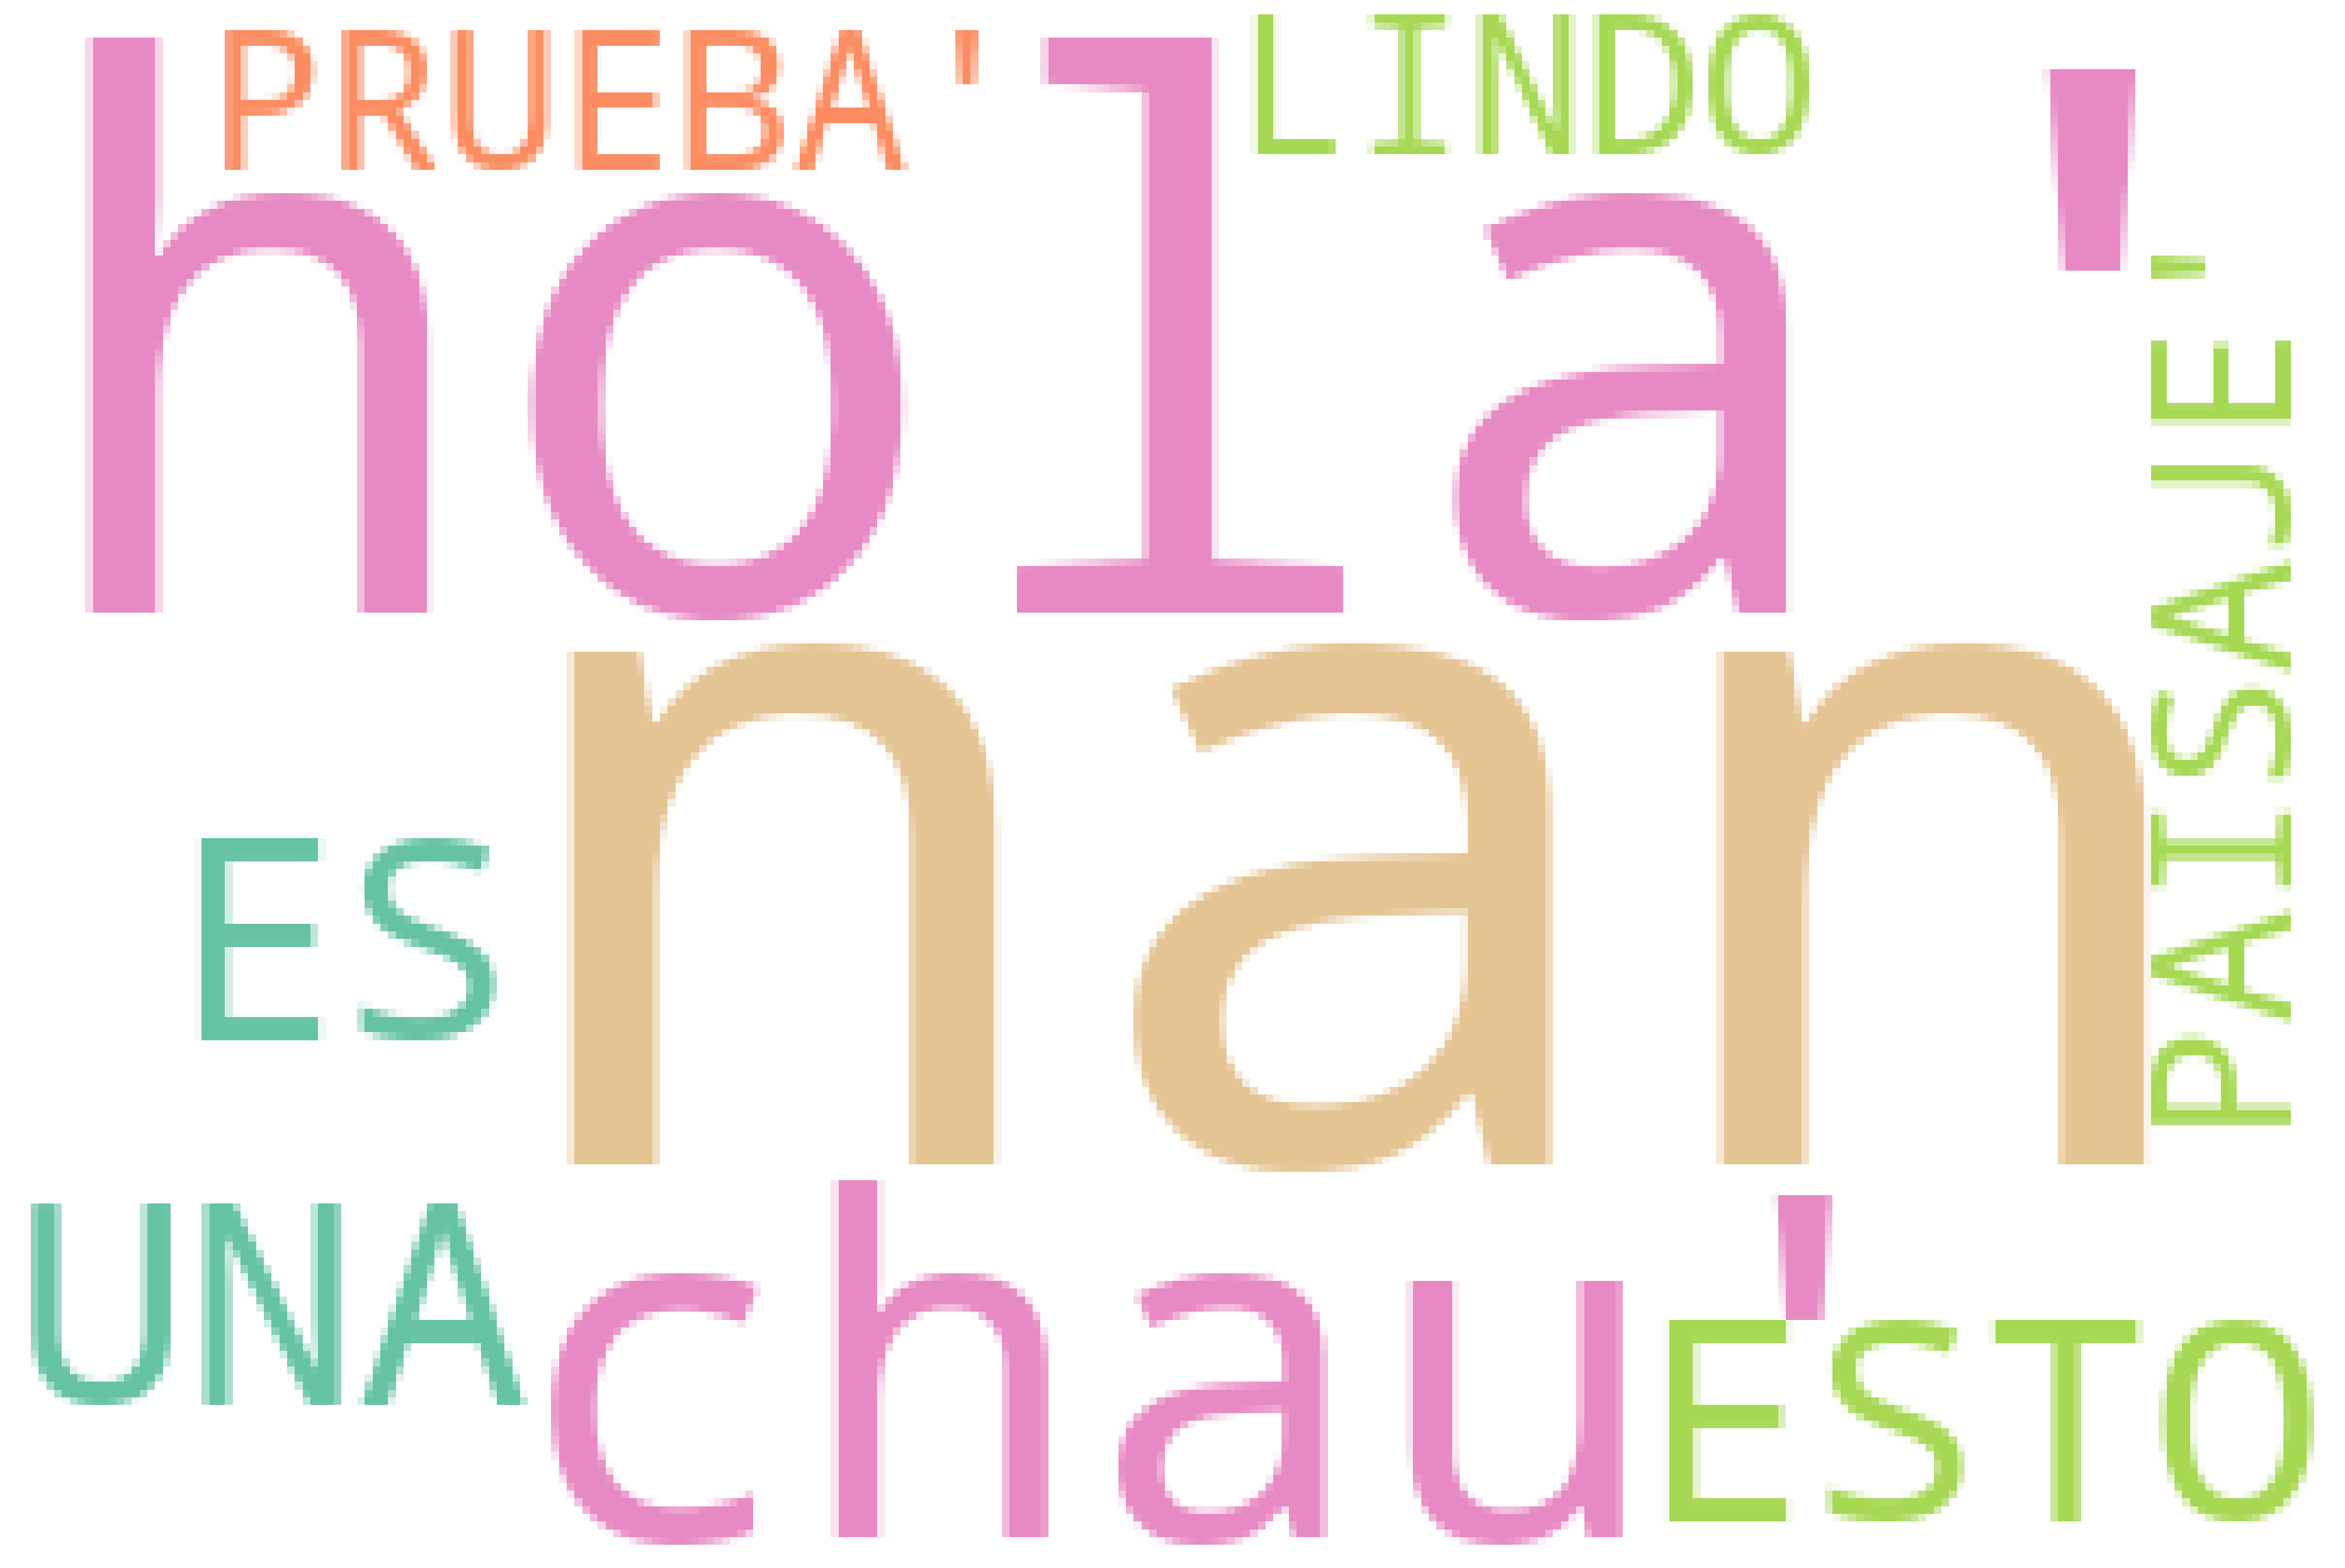

In [203]:
ds_nube= ds.copy()
ds_nube['textos'] = ds['textos'].str.split(';')
nube_tags = ds_nube['textos'].explode().unique()
text = str(nube_tags)
wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


- Con los datos del archivo de perfiles generar un gráfico de torta con los porcentajes
según género de las personas que realizaron las operaciones:
    ○ Nueva imagen clasificada.
    ○ Modificación de imagen previamente clasificada.

Se realiza un merge entre el archivo de logs y el jason que contiene los perfiles. Luego deja en el dataframe solo aquellas lineas donde se haya clasificado una nueva imagen o se haya cambiado una anterior, y cuenta cuantas veces aparece cada genero

In [229]:
outer_join = pd.merge(ds, js, on= 'nick', how= 'outer')
outer_join = outer_join.fillna(0)
ds_t = outer_join[((outer_join['operacion'] == 'nueva_imagen_clasificada') | (outer_join['operacion'] == 'imagen_previamente_clasificada'))]
serie_genero = ds_t.groupby(['Genero']).size()
serie_genero

Genero
Hombre       7
Mujer        2
nobinario    1
dtype: int64

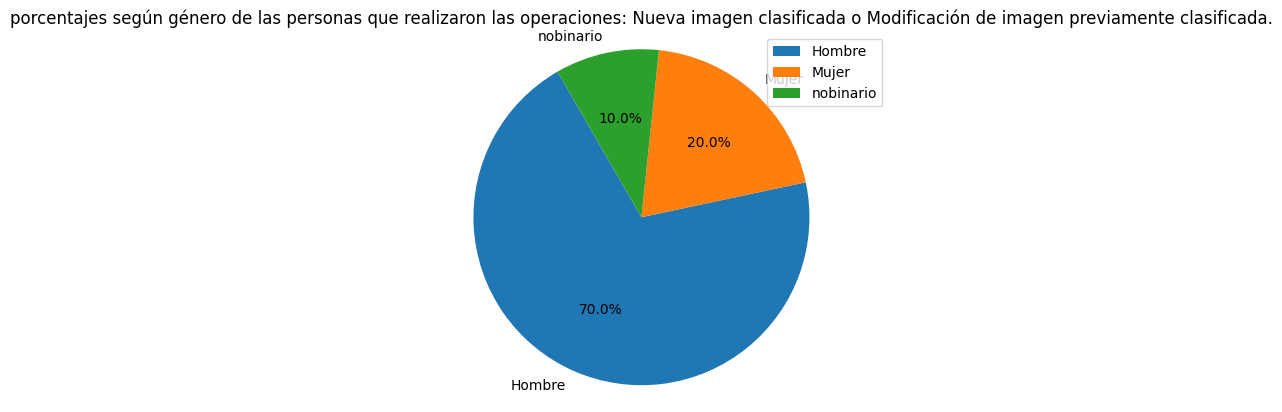

In [230]:
etiquetas = list(serie_genero.index)
plt.pie(serie_genero, labels= etiquetas, autopct='%1.1f%%', startangle=120, labeldistance= 1.1)
plt.axis('equal')
plt.legend(etiquetas)
plt.title('porcentajes según género de las personas que realizaron las operaciones: Nueva imagen clasificada o Modificación de imagen previamente clasificada.')
plt.show()